<a href="https://colab.research.google.com/github/ch23s020/CH5041_Project/blob/main/CH23S020_Project_CH5041.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failure Days for Each Sensor: [ 3.21894941 10.19516752  9.77898119 15.05268489  6.50305204 31.97454055
 59.65487573 17.86851193  2.27961454  1.43928111]
Frequency of Failure for Each Sensor: [0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0]


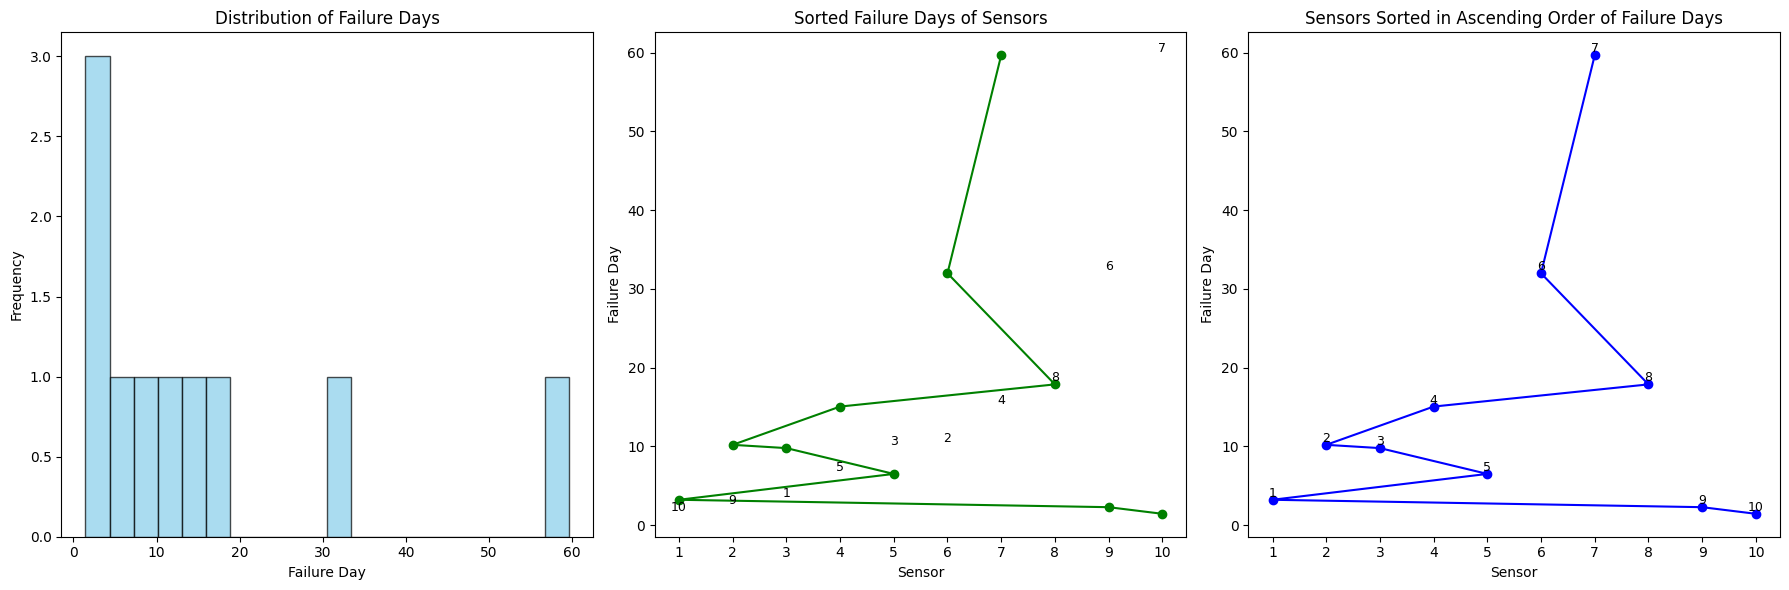

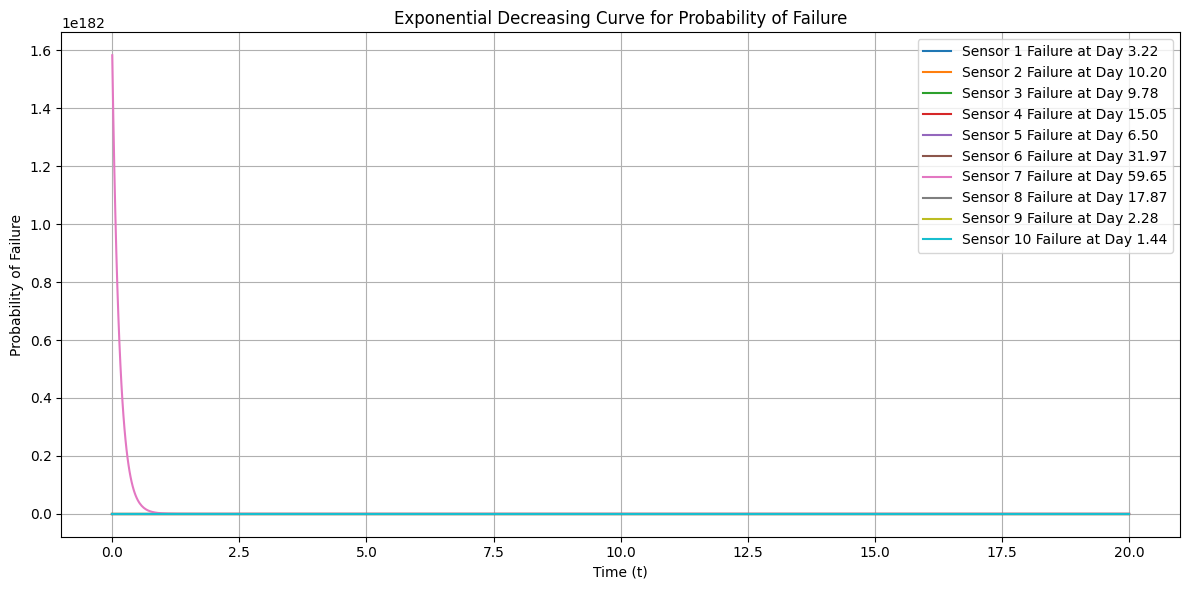

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(82)

# Define time points
t = np.linspace(0, 20, 1000)  # Increased the range of time points

# Define the range of sensors
num_sensors = 10

sensors = range(1, num_sensors + 1)

# Define rate parameter for exponential distribution

rate = 0.10 # Adjust this parameter to control the spread of failure days

# Generate failure days for each sensor from an exponential distribution

failure_days = np.random.exponential(1/rate, num_sensors)

print("Failure Days for Each Sensor:", failure_days)

# Calculate the frequency of failure for each sensor

failure_counts = np.histogram(failure_days, bins=20, range=(0, 20))[0]

print("Frequency of Failure for Each Sensor:", failure_counts)

# Sorting sensors based on failure days

sorted_indices = np.argsort(failure_days)

sorted_sensors = [sensors[i] for i in sorted_indices]

sorted_failure_days = [failure_days[i] for i in sorted_indices]

# Sorting sensors in ascending order of failure days

ascending_indices = np.argsort(sorted_failure_days)

ascending_sensors = [sorted_sensors[i] for i in ascending_indices]

ascending_failure_days = [sorted_failure_days[i] for i in ascending_indices]

# Plotting

plt.figure(figsize=(18, 6))

# Plot failure day distribution histogram

plt.subplot(1, 3, 1)

plt.hist(failure_days, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Failure Days')

plt.xlabel('Failure Day')

plt.ylabel('Frequency')

# Plot sorted failure days

plt.subplot(1, 3, 2)

plt.plot(sorted_sensors, sorted_failure_days, marker='o', linestyle='-', color='green')

plt.title('Sorted Failure Days of Sensors')

plt.xlabel('Sensor')

plt.ylabel('Failure Day')

plt.xticks(sensors)  # Adjust x-axis ticks to show all sensors

for i, day in enumerate(sorted_failure_days):

    plt.text(i + 1, day, f'{sorted_sensors[i]}', fontsize=9, ha='center', va='bottom')  # Add sensor index or name

# Plot sorted sensors in ascending order of failure days

plt.subplot(1, 3, 3)

plt.plot(ascending_sensors, ascending_failure_days, marker='o', linestyle='-', color='blue')

plt.title('Sensors Sorted in Ascending Order of Failure Days')

plt.xlabel('Sensor')

plt.ylabel('Failure Day')

plt.xticks(sensors)  # Adjust x-axis ticks to show all sensors

for i, day in enumerate(ascending_failure_days):

    plt.text(ascending_sensors[i], day, f'{ascending_sensors[i]}', fontsize=9, ha='center', va='bottom')  # Add sensor index or name

plt.tight_layout()

# Generating exponential plots

plt.figure(figsize=(12, 6))

for a, failure_day in zip(sensors, failure_days):

    p_t = a * np.exp(-a * (t-failure_day))  # Introduce time offset for each sensor

    plt.plot(t, p_t, label=f'Sensor {a} Failure at Day {failure_day:.2f}')

plt.title('Exponential Decreasing Curve for Probability of Failure')

plt.xlabel('Time (t)')

plt.ylabel('Probability of Failure')

plt.legend()

plt.grid(True)

plt.tight_layout()
plt.show()


Cost for A One Scenario Random Seed 82 (RS_82)

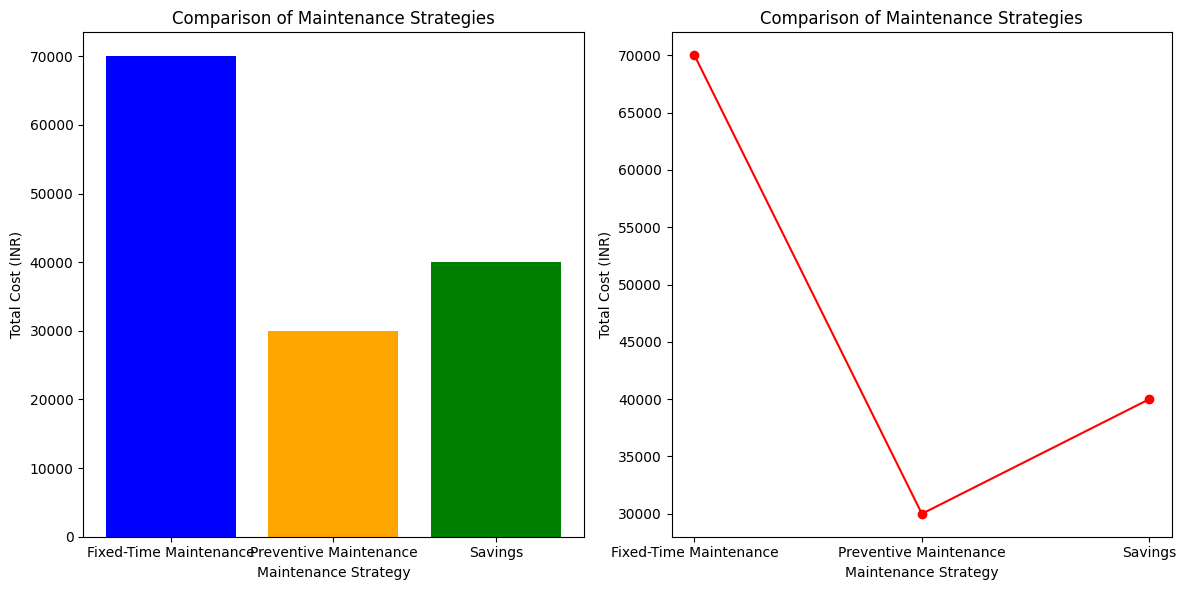

In [2]:
import matplotlib.pyplot as plt

# Define constants

working_capital = 100000  # Working capital of the plant

failure_cost_per_sensor = 5000  # Cost incurred per sensor failure (in rupees)

fixed_maintenance_cost_per_sensor = 2000  # Cost incurred for fixed-time maintenance per sensor (in rupees)

preventive_maintenance_cost_per_sensor = 1000  # Cost incurred for preventive maintenance per sensor (in rupees)

# Failure days and frequency of failure as provided (For a particular random seed, here for RS82)

failure_days = [3.22, 10.20, 9.78, 15.05, 6.50, 31.97, 59.65, 17.87, 2.28, 1.44]

failure_frequency = [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]

# Calculate cost of fixed-time maintenance for all sensors

fixed_maintenance_cost_all = fixed_maintenance_cost_per_sensor * len(failure_days)

# Calculate cost of preventive maintenance for failing sensors only

preventive_maintenance_cost_failing = 0

for i, frequency in enumerate(failure_frequency):

    if frequency == 1:  # If the sensor is expected to fail

        preventive_maintenance_cost_failing += preventive_maintenance_cost_per_sensor

# Calculate total cost of failure for fixed-time maintenance

failure_cost_all = failure_cost_per_sensor * len(failure_days)

# Calculate total cost of failure for preventive maintenance

failure_cost_failing = failure_cost_per_sensor * sum(failure_frequency)

# Calculate total costs in rupees

total_cost_fixed_maintenance = fixed_maintenance_cost_all + failure_cost_all

total_cost_preventive_maintenance = preventive_maintenance_cost_failing + failure_cost_failing

# Calculate savings from preventive maintenance

savings = total_cost_fixed_maintenance - total_cost_preventive_maintenance

# Plotting the comparison

categories = ['Fixed-Time Maintenance', 'Preventive Maintenance', 'Savings']

costs = [total_cost_fixed_maintenance, total_cost_preventive_maintenance, savings]

plt.figure(figsize=(12, 6))

# Bar plot

plt.subplot(1, 2, 1)

plt.bar(categories, costs, color=['blue', 'orange', 'green'])

plt.xlabel('Maintenance Strategy')

plt.ylabel('Total Cost (INR)')

plt.title('Comparison of Maintenance Strategies')

# Line plot

plt.subplot(1, 2, 2)

plt.plot(categories, costs, marker='o', linestyle='-', color='red')

plt.xlabel('Maintenance Strategy')

plt.ylabel('Total Cost (INR)')

plt.title('Comparison of Maintenance Strategies')

plt.tight_layout()
plt.show()


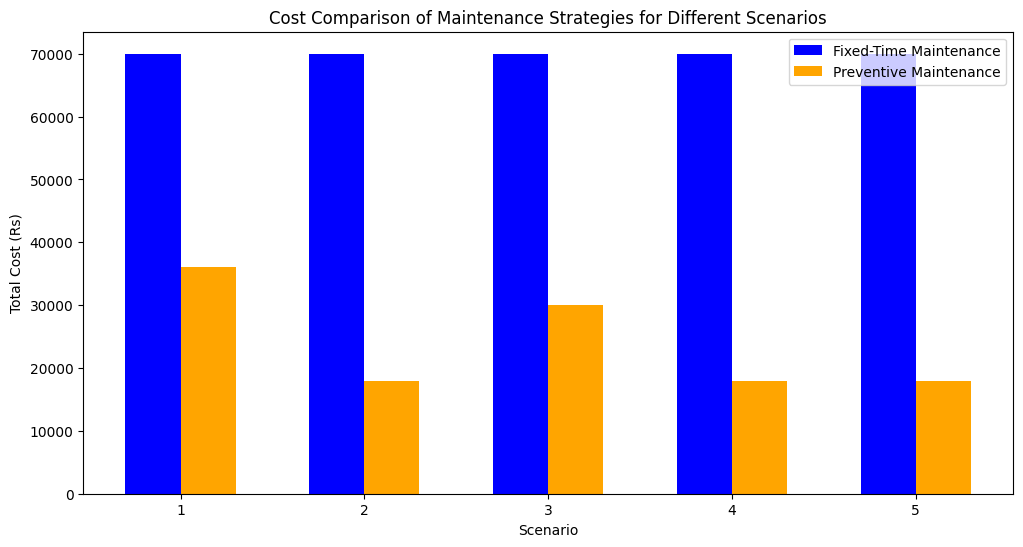

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants

working_capital = 100000  # Working capital of the plant

failure_cost_per_sensor = 5000  # Cost incurred per sensor failure

fixed_maintenance_cost_per_sensor = 2000  # Cost incurred for fixed-time maintenance per sensor

preventive_maintenance_cost_per_sensor = 1000  # Cost incurred for preventive maintenance per sensor

# Number of different scenarios to simulate

num_scenarios = 5

# Initialize lists to store results

total_cost_fixed_maintenance_list = []

total_cost_preventive_maintenance_list = []

savings_list = []

# Loop through different scenarios

for i in range(num_scenarios):

    # Set a random seed for reproducibility
    np.random.seed(i)

    # Generate random failure days for each sensor from an exponential distribution

    num_sensors = 10

    failure_days = np.random.exponential(scale=10, size=num_sensors)

    # Generate random failure frequency for each sensor (0 or 1)

    failure_frequency = np.random.randint(2, size=num_sensors)

    # Calculate cost of fixed-time maintenance for all sensors

    fixed_maintenance_cost_all = fixed_maintenance_cost_per_sensor * num_sensors

    # Calculate cost of preventive maintenance for failing sensors only

    preventive_maintenance_cost_failing = sum(failure_frequency) * preventive_maintenance_cost_per_sensor

    # Calculate total cost of failure for fixed-time maintenance

    failure_cost_all = failure_cost_per_sensor * num_sensors

    # Calculate total cost of failure for preventive maintenance

    failure_cost_failing = failure_cost_per_sensor * sum(failure_frequency)

    # Calculate total costs

    total_cost_fixed_maintenance = fixed_maintenance_cost_all + failure_cost_all

    total_cost_preventive_maintenance = preventive_maintenance_cost_failing + failure_cost_failing

    # Calculate savings from preventive maintenance

    savings = total_cost_fixed_maintenance - total_cost_preventive_maintenance

    # Append results to lists

    total_cost_fixed_maintenance_list.append(total_cost_fixed_maintenance)

    total_cost_preventive_maintenance_list.append(total_cost_preventive_maintenance)

    savings_list.append(savings)

# Plotting the comparison for each scenario

plt.figure(figsize=(12, 6))

plt.bar(np.arange(num_scenarios) - 0.15, total_cost_fixed_maintenance_list, width=0.3, label='Fixed-Time Maintenance', color='blue')

plt.bar(np.arange(num_scenarios) + 0.15, total_cost_preventive_maintenance_list, width=0.3, label='Preventive Maintenance', color='orange')

plt.xticks(np.arange(num_scenarios), np.arange(num_scenarios) + 1)

plt.xlabel('Scenario')

plt.ylabel('Total Cost (Rs)')

plt.title('Cost Comparison of Maintenance Strategies for Different Scenarios')

plt.legend()
plt.show()
